In [124]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [125]:
# Veri setini okumak
df = pd.read_csv("Smart watch prices.csv",delimiter=",")
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


In [126]:
print(df.columns)

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')


In [127]:
df.Brand.unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex',
       'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG',
       nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia',
       'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

In [128]:
df.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [129]:
import pandas as pd
import numpy as np

# Örnek veri çerçevesi (df) oluşturulması
# df = pd.read_csv('veri_dosyasi.csv')

# Eksik değerleri uygun şekilde doldurmak

# Sayısal olmayan değerleri sayısal verilere dönüştürmeden önce temizlik yapın
# 'Battery Life (days)' gibi sütunları sayısal değerlere dönüştürmek için bir temizleme yapabilirsiniz
def clean_battery_life(value):
    if isinstance(value, str):
        # 'hours' gibi birim eklerini temizleyin ve sayısal değere dönüştürün
        try:
            return float(value.split()[0])
        except:
            return np.nan
    return value

df['Battery Life (days)'] = df['Battery Life (days)'].apply(clean_battery_life)
df['Battery Life (days)'].fillna(df['Battery Life (days)'].median(), inplace=True)

# 'Display Size (inches)' gibi sütunları medyan ile doldurma
df['Display Size (inches)'].fillna(df['Display Size (inches)'].median(), inplace=True)

# Kategorik sütunlar için en sık rastlanan değerlerle doldurma
df['Resolution'].fillna('Bilinmiyor', inplace=True)
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Operating System'].fillna(df['Operating System'].mode()[0], inplace=True)
df['Connectivity'].fillna(df['Connectivity'].mode()[0], inplace=True)
df['Display Type'].fillna(df['Display Type'].mode()[0], inplace=True)
df['Water Resistance (meters)'].fillna(df['Water Resistance (meters)'].mode()[0], inplace=True)
df['Heart Rate Monitor'].fillna(df['Heart Rate Monitor'].mode()[0], inplace=True)
df['GPS'].fillna(df['GPS'].mode()[0], inplace=True)
df['NFC'].fillna(df['NFC'].mode()[0], inplace=True)
df['Price (USD)'].fillna(df['Price (USD)'].mode()[0], inplace=True)

print("Eksik değerler dolduruldu.")


Eksik değerler dolduruldu.


In [130]:
# Kontrol sağlama
df.isnull().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      379 non-null    object 
 1   Model                      379 non-null    object 
 2   Operating System           379 non-null    object 
 3   Connectivity               379 non-null    object 
 4   Display Type               379 non-null    object 
 5   Display Size (inches)      379 non-null    float64
 6   Resolution                 379 non-null    object 
 7   Water Resistance (meters)  379 non-null    object 
 8   Battery Life (days)        379 non-null    float64
 9   Heart Rate Monitor         379 non-null    object 
 10  GPS                        379 non-null    object 
 11  NFC                        379 non-null    object 
 12  Price (USD)                379 non-null    object 
dtypes: float64(2), object(11)
memory usage: 38.6+ KB


In [132]:
from sklearn.preprocessing import LabelEncoder

# Nesne veri türüne sahip sütunları seçme
object_columns = ['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Resolution', 'Water Resistance (meters)', 'Heart Rate Monitor', 'GPS', 'NFC', 'Price (USD)' ]

# LabelEncoder nesnelerini depolamak için bir sözlük oluşturma
le_dict = {}

# Her bir nesne sütunu için LabelEncoder uygulama
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    le_dict[column] = le

# Dönüştürülmüş DataFrame'i gösterme
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,127,34,2,17,1.90,27,5,18.0,0,1,1,33
1,30,36,31,2,0,1.40,31,5,40.0,0,1,1,20
2,8,105,9,1,0,1.30,30,5,11.0,0,1,0,33
3,6,109,7,1,0,1.58,19,5,6.0,0,1,1,19
4,7,43,31,1,0,1.28,30,4,24.0,0,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.38,21,5,30.0,0,0,1,25
375,41,132,33,2,0,1.39,32,5,15.0,0,1,1,30
376,9,119,12,1,0,1.39,32,5,25.0,0,1,1,20
377,26,118,5,1,0,1.64,17,5,14.0,0,0,1,12


In [133]:
# Assuming you have your dataset X and target y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [134]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [135]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [136]:
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,127,34,2,17,1.90,27,5,18.0,0,1,1,33
1,30,36,31,2,0,1.40,31,5,40.0,0,1,1,20
2,8,105,9,1,0,1.30,30,5,11.0,0,1,0,33
3,6,109,7,1,0,1.58,19,5,6.0,0,1,1,19
4,7,43,31,1,0,1.28,30,4,24.0,0,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.38,21,5,30.0,0,0,1,25
375,41,132,33,2,0,1.39,32,5,15.0,0,1,1,30
376,9,119,12,1,0,1.39,32,5,25.0,0,1,1,20
377,26,118,5,1,0,1.64,17,5,14.0,0,0,1,12


FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=12)

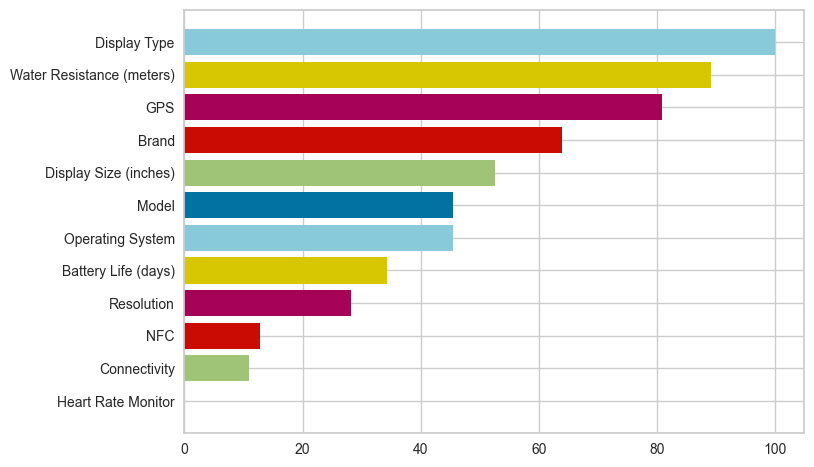

In [137]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances

column_names = x_train.columns.tolist()

regressor = XGBRegressor()

viz = FeatureImportances(regressor, topn=12)

viz.fit(x_train, y_train)

In [138]:
# Özellik isimlerini alın
feature_names = viz.features_

# İlk 12 özelliğin isimlerini alın
top_12_feature_names = feature_names[:12]

print(top_12_feature_names)

['Heart Rate Monitor' 'Connectivity' 'NFC' 'Resolution'
 'Battery Life (days)' 'Operating System' 'Model' 'Display Size (inches)'
 'Brand' 'GPS' 'Water Resistance (meters)' 'Display Type']


In [139]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [141]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [142]:
import pandas as pd

# Model ile tahmin yapma
y_pred = model.predict(x_test)

# y_pred ve y_test verilerini DataFrame'e dönüştürme
y_pred_df = pd.DataFrame(data=y_pred, columns=["Tahmini_Sonuc"])
y_test_df = pd.DataFrame(data=y_test.values, columns=["Gerçek_Sonuç"])

# y_test_df ve y_pred_df DataFrame'lerini birleştirme
karsılastırma_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Sonuçların görüntülenmesi
karsılastırma_df

,Gerçek_Sonuç,Tahmini_Sonuc
0,16,17.976700
1,19,18.995497
2,8,31.014860
3,16,16.007601
4,27,23.358047
...,...,...
71,30,24.780081
72,15,12.198498
73,27,26.206209
74,20,29.999380


In [143]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.973297859493055
Mean Squared Error (MSE): 52.677695961998815
Root Mean Squared Error (RMSE): 7.257940201048698


In [144]:
from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.981938258650307

Test seti tahmin: 0.455705930873444


In [145]:
import joblib

# Modeli kaydet
joblib.dump(model, "xgb_model.joblib")

# Seçilen özellik isimlerini kaydet
joblib.dump(top_12_feature_names, "top_12_feature_names.joblib")

['top_12_feature_names.joblib']

In [146]:
import joblib

# Özellik isimlerini yükleme
top_12_feature_names = joblib.load("top_12_feature_names.joblib")
top_12_feature_names

array(['Heart Rate Monitor', 'Connectivity', 'NFC', 'Resolution',
       'Battery Life (days)', 'Operating System', 'Model',
       'Display Size (inches)', 'Brand', 'GPS',
       'Water Resistance (meters)', 'Display Type'], dtype=object)

In [147]:
df.Brand.unique()

array([ 1, 30,  8,  6,  7, 10, 35, 26,  0, 31, 38, 37, 33, 18, 27, 36, 39,
        9, 13,  3, 25, 17, 20, 22, 24, 32, 41, 29, 15, 11,  4, 16, 40, 12,
       14, 34, 19,  2,  5, 28, 21, 23])

In [148]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnelerini depoladığınız sözlüğü kullanarak geri dönüşüm yapma
def inverse_transform_column(df, column, le):
    # Sütunun etiketlenmiş değerlerini orijinal değerlerine geri dönüştürür
    df[column] = le.inverse_transform(df[column])
    return df

# Her bir nesne sütunu için inverse_transform uygulama
for column, le in le_dict.items():
    df = inverse_transform_column(df, column, le)

# Dönüştürülmüş DataFrame'in orijinal halini gösterme
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18.0,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40.0,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11.0,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6.0,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24.0,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30.0,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15.0,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25.0,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14.0,Yes,No,Yes,$159


In [149]:
sample_one = [{
    'Brand': 'Apple',
    'Model': 'Watch Series 7',
    'Operating System': 'watchOS',
    'Connectivity': 'Bluetooth, Wi-Fi',
    'Display Type': 'Retina',
    'Display Size (inches)':  '1.90',
    'Resolution': '396x484',
    'Water Resistance (meters)': '50',
    'Battery Life (days)': 18.0,
    'Heart Rate Monitor': 'Yes',
    'GPS': 'Yes',
    'NFC': 'Yes'
}]

In [150]:
import pandas as pd
df_s = pd.DataFrame(sample_one)
df_s

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi",Retina,1.90,396x484,50,18.0,Yes,Yes,Yes


In [151]:
#scaler = joblib.load(open("scaler.joblib","rb"))
model = joblib.load(open("xgb_model.joblib","rb"))
#df_s = scaler.transform(df_s)

In [152]:
# model = joblib.load("model.joblib")